# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [1]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# TODO: Set up a connection the "Market.db" database
connection = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cursor = connection.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [3]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('Categories',), ('sqlite_sequence',), ('Customers',), ('Employees',), ('Shippers',), ('Suppliers',), ('Products',), ('Orders',), ('OrderDetails',)]


In [4]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT COUNT(*) 
    FROM Products
    WHERE Price < 10;
""")

rows = cursor.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [5]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT Country, COUNT(*) AS SupplierCount
FROM Suppliers
GROUP BY Country
ORDER BY SupplierCount DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


        Country  SupplierCount
0           USA              4
1       Germany              3
2        France              3
3            UK              2
4        Sweden              2
5         Japan              2
6         Italy              2
7        Canada              2
8     Australia              2
9         Spain              1
10    Singapore              1
11       Norway              1
12  Netherlands              1
13      Finland              1
14      Denmark              1
15       Brazil              1


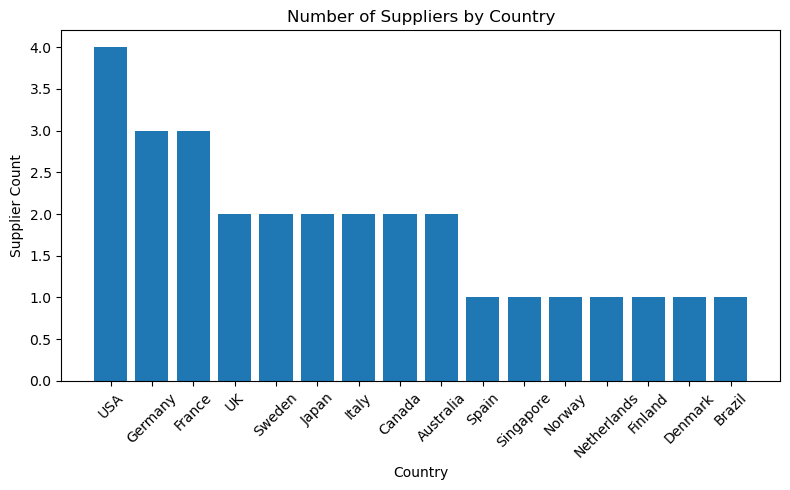

In [6]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'SupplierCount'])
print(df)

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(8, 5))
plt.bar(df['Country'], df['SupplierCount'])
plt.title('Number of Suppliers by Country')
plt.xlabel('Country')
plt.ylabel('Supplier Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [7]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT(*) AS CustomerCount
    FROM Customers
    GROUP BY Country
    ORDER BY CustomerCount DESC;
""")
# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]


        Country  CustomerCount
0           USA             13
1       Germany             11
2        France             11
3        Brazil              9
4            UK              7
5         Spain              5
6        Mexico              5
7     Venezuela              4
8         Italy              3
9        Canada              3
10    Argentina              3
11  Switzerland              2
12       Sweden              2
13     Portugal              2
14      Finland              2
15      Denmark              2
16      Belgium              2
17      Austria              2
18       Poland              1
19       Norway              1
20      Ireland              1


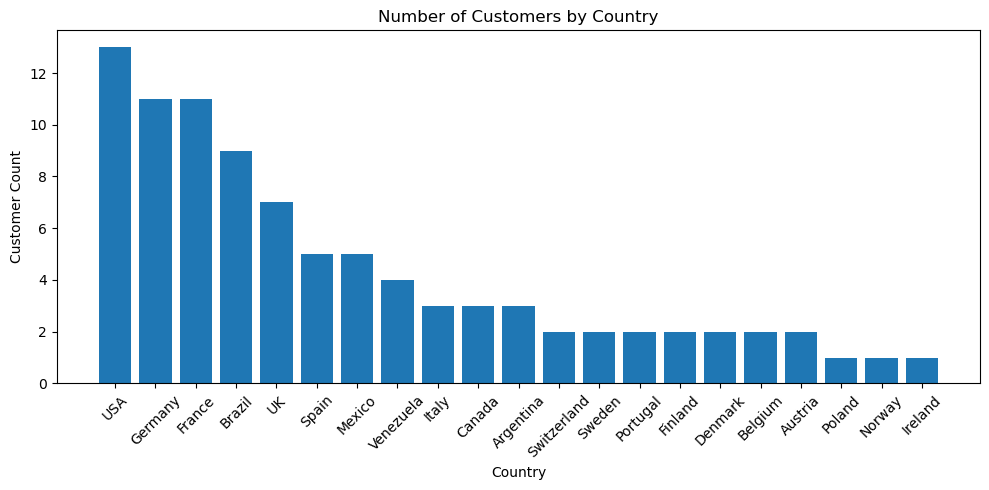

In [8]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'CustomerCount'])
print(df)

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 5))
plt.bar(df['Country'], df['CustomerCount'])
plt.title('Number of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [9]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT Products.ProductName, SUM(OrderDetails.Quantity) AS TotalQuantity
FROM Products
INNER JOIN OrderDetails ON Products.ProductID = OrderDetails.ProductID
GROUP BY Products.ProductName
ORDER BY TotalQuantity ASC
LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print("Least Popular Products by Quantity:")
for product, quantity in rows:
    print(f"{product}: {quantity}")

Least Popular Products by Quantity:
Laughing Lumberjack Lager: 5
Røgede sild: 15
Gustaf's Knäckebröd: 18
Mishi Kobe Niku: 20
Genen Shouyu: 25
Uncle Bob's Organic Dried Pears: 25
Queso Manchego La Pastora: 27
Grandma's Boysenberry Spread: 36
Gravad lax: 39
Röd Kaviar: 45
Filo Mix: 48
Mascarpone Fabioli: 52
Chocolade: 70
Valkoinen suklaa: 70
NuNuCa Nuß-Nougat-Creme: 71
Singaporean Hokkien Fried Mee: 77
Aniseed Syrup: 80
Ikura: 85
Louisiana Hot Spiced Okra: 90
Schoggi Schokolade: 90


                        ProductName  TotalQuantity
0         Laughing Lumberjack Lager              5
1                       Røgede sild             15
2               Gustaf's Knäckebröd             18
3                   Mishi Kobe Niku             20
4                      Genen Shouyu             25
5   Uncle Bob's Organic Dried Pears             25
6         Queso Manchego La Pastora             27
7      Grandma's Boysenberry Spread             36
8                        Gravad lax             39
9                        Röd Kaviar             45
10                         Filo Mix             48
11               Mascarpone Fabioli             52
12                        Chocolade             70
13                 Valkoinen suklaa             70
14          NuNuCa Nuß-Nougat-Creme             71
15    Singaporean Hokkien Fried Mee             77
16                    Aniseed Syrup             80
17                            Ikura             85
18        Louisiana Hot Spiced 

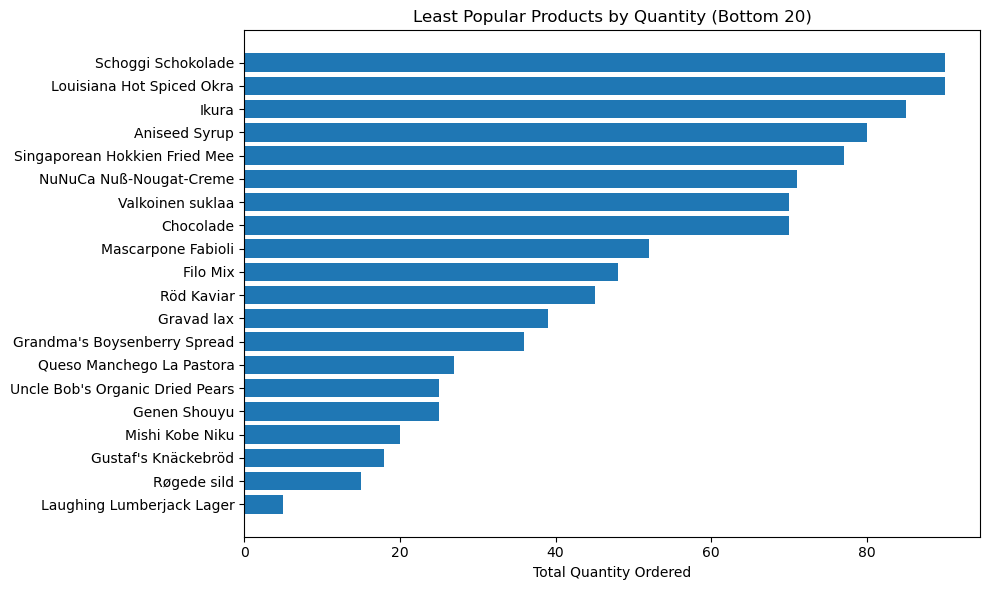

In [10]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['ProductName', 'TotalQuantity'])
print(df)

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
plt.barh(df['ProductName'], df['TotalQuantity'])
plt.xlabel('Total Quantity Ordered')
plt.title('Least Popular Products by Quantity (Bottom 20)')
plt.tight_layout()
plt.show()

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [11]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT p.ProductName, SUM(od.Quantity * p.Price) AS total_revenue
FROM OrderDetails od
JOIN Products p ON od.ProductID = p.ProductID
GROUP BY p.ProductName
ORDER BY total_revenue ASC
LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('Laughing Lumberjack Lager', 70), ('Røgede sild', 142.5), ('Filo Mix', 336), ("Gustaf's Knäckebröd", 378), ('Genen Shouyu', 387.5), ('Konbu', 552), ('Röd Kaviar', 675), ('Guaraná Fantástica', 711.0), ("Uncle Bob's Organic Dried Pears", 750), ('Geitost', 790.0), ('Aniseed Syrup', 800), ('Chocolade', 892.5), ("Grandma's Boysenberry Spread", 900), ('Zaanse koeken', 959.5), ('NuNuCa Nuß-Nougat-Creme', 994), ('Gravad lax', 1014), ('Queso Manchego La Pastora', 1026), ('Singaporean Hokkien Fried Mee', 1078), ('Rhönbräu Klosterbier', 1116.0), ('Valkoinen suklaa', 1137.5)]


                       Product Name  Total Revenue
0         Laughing Lumberjack Lager           70.0
1                       Røgede sild          142.5
2                          Filo Mix          336.0
3               Gustaf's Knäckebröd          378.0
4                      Genen Shouyu          387.5
5                             Konbu          552.0
6                        Röd Kaviar          675.0
7                Guaraná Fantástica          711.0
8   Uncle Bob's Organic Dried Pears          750.0
9                           Geitost          790.0
10                    Aniseed Syrup          800.0
11                        Chocolade          892.5
12     Grandma's Boysenberry Spread          900.0
13                    Zaanse koeken          959.5
14          NuNuCa Nuß-Nougat-Creme          994.0
15                       Gravad lax         1014.0
16        Queso Manchego La Pastora         1026.0
17    Singaporean Hokkien Fried Mee         1078.0
18             Rhönbräu Kloster

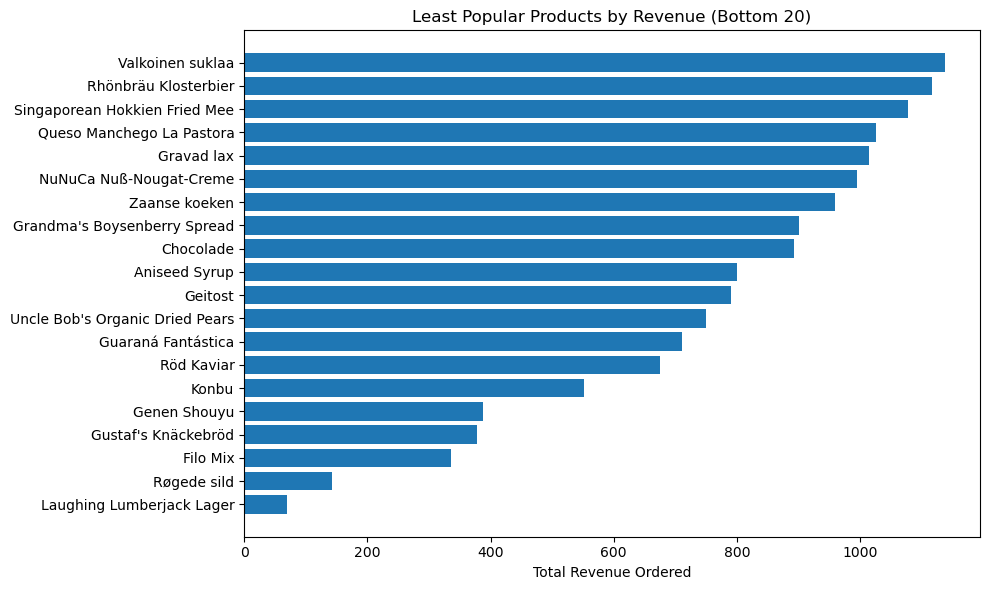

In [12]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Product Name', 'Total Revenue'])
print(df)

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
plt.barh(df['Product Name'], df['Total Revenue'])
plt.xlabel('Total Revenue Ordered')
plt.title('Least Popular Products by Revenue (Bottom 20)')
plt.tight_layout()
plt.show()

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [13]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [14]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [15]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [16]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [17]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [18]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

[Answer Here]

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

[Answer Here]

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

[Answer Here]

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

[Answer Here]